### Persamaan Bézier

Persamaan Bézier Polinonial:

$$
\mathbf{B}(t) = \sum_{i=0}^{n} {n \choose i} (1-t)^{n-i} t^{i} \mathbf{P}_{i} 
$$

atau secara eksplisit:

$$
\mathbf{B}(t) = (1-t)^{n} \mathbf{P}_{0} + {n \choose 1} (1-t)^{n-1} t \mathbf{P}_{1} + \cdots + {n \choose n-1} (1-t) t^{n-1} \mathbf{P}_{n-1} + t^{n} \mathbf{P}_{n}, \quad 0 \leq t \leq 1
$$

di mana:
- $ \mathbf{P}_{i} $ adalah titik kontrol.
- $ t $ adalah parameter yang bervariasi dari 0 hingga 1.
- $ {n \choose i} $ adalah koefisien binomial.

In [7]:
from math import comb
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

In [12]:
def _bezier_n(t: float, points: list) -> float:
    """
    t: delta t
    points: titik kordinat
    """
    n = len(points) - 1

    x = 0.0
    y = 0.0

    for i in range(n + 1):
        basis = comb(n, i) * ((1 - t) ** (n - i)) * (t**i)
        x += basis * points[i][0]
        y += basis * points[i][1]

    return x, y

In [13]:
def kubik(delta_t: float, points: list) -> list:
    """
    Menghitung kuarva kubik

    Args:
    - points: list koordinat titik kontrol [(x0, y0), (x1, y1), (x2, y2), .... (xn, yn)]
    - delta_t: langkah perubahan nilai t (misalnya 0.01)

    Returns:
    - list_points: Daftar koordinat (x, y) pada kurva
    """
    if len(points) <= 3:
        raise ValueError("Kordinat harus lebih dari 3 titik!!!")

    t = 0.0
    point = []

    # 0 <= t <= 1
    while t <= 1:
        x, y = _bezier_n(t, points)
        point.append((x, y))

        t += delta_t
    return point

In [14]:
def plot_bzier(bzr: list) -> None:
    x_coords = [point[0] for point in bzr]
    y_coords = [point[1] for point in bzr]

    plt.figure(figsize=(6, 6))
    plt.plot(x_coords, y_coords, marker='o', color='blue', markersize=5, linestyle='-', linewidth=1)
    plt.title("Plot Titik Perpindahan Algoritma Bezier")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()


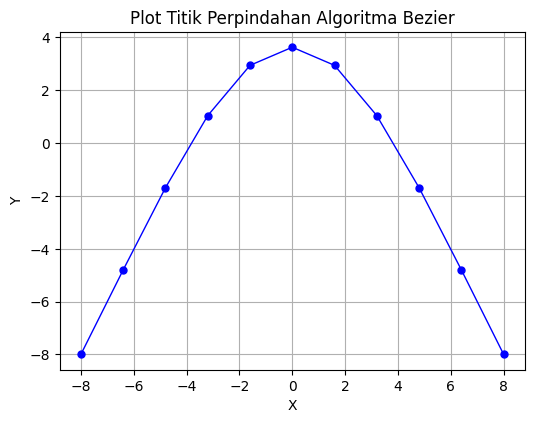

In [16]:
delta_t = 0.1

points_kubik = [
    (-8, -8),
    (-6, -4),
    (-4, 0),
    (-2, 4),
    (0, 8),
    (2, 4),
    (4, 0),
    (6, -4),
    (8, -8)
]

bzr_kubik = kubik(delta_t, points_kubik)
plot_bzier(bzr_kubik)